### 1. Load the Iris Dataset

In [9]:
%matplotlib inline
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

### 2. 10 Fold Cross-Validation using Hyperparameter Tuning

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [32]:
# Setup range and empty array for score means
k_range = range(1, 31)
score_means = []

# Get cross val score for each number in the range
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris.data, iris.target, cv=10)
    score_means.append(scores.mean())

score_means = np.array(score_means)

### 3. Detemrine optimal k-range and plot

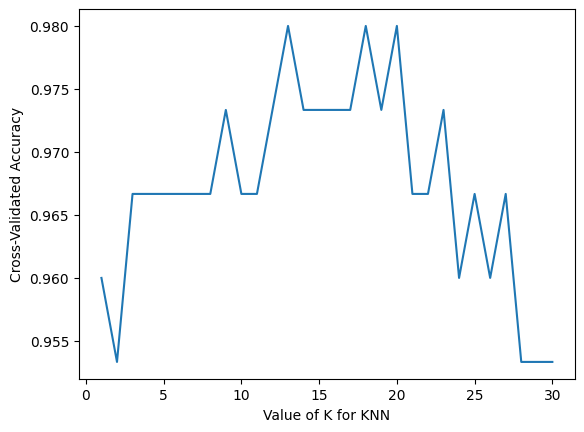

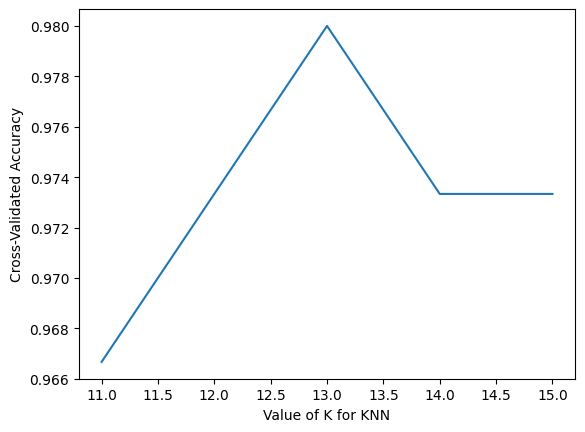

In [34]:
# Plot range 1-31
plt.figure()
plt.plot(list(k_range), score_means)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

# Plot range 11-16
k_range_zoom = range(11, 16)
score_means_zoom = []
for k in k_range_zoom:
  score_means_zoom.append(score_means[k - 1])

plt.figure()
plt.plot(list(k_range_zoom), score_means_zoom)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

### 4. Confirm with GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": list(k_range)}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(iris.data, iris.target)

print("GridSearchCV best params:", grid.best_params_)
print(f"GridSearchCV best accuracy: {grid.best_score_:.4f}")

GridSearchCV best params: {'n_neighbors': 13}
GridSearchCV best accuracy: 0.9800
